# LIBRERIAS INSTALADAS

In [1]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

# Importar dataset

In [3]:
net_df = pd.read_csv("df_all_days.csv", index_col="DATE OCC", parse_dates=True)
net_df

,Agressions,New Years,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,agressions_week_avg,agressions_biweek_avg,agressions_1_month_avg,agressions_2_month_avg,...,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)"
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2010-01-01,129.0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521
2010-01-02,7.0,0,76.0,90.0,87.0,116.0,89.142857,0.000000,0.000000,0.000000,...,0.201299,0.979530,0.394356,0.918958,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490
2010-01-03,3.0,0,2.0,7.0,5.0,6.0,5.142857,22.214286,0.000000,0.000000,...,0.394356,0.918958,0.724793,0.688967,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969
2010-01-04,5.0,0,5.0,5.0,7.0,9.0,6.000000,5.000000,36.266667,0.000000,...,0.571268,0.820763,0.937752,0.347305,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2010-01-05,1.0,0,5.0,4.0,7.0,6.0,4.714286,5.214286,5.166667,0.000000,...,0.724793,0.688967,0.998717,-0.050649,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,10.0,0,5.0,7.0,4.0,4.0,6.428571,5.428571,5.300000,5.233333,...,-0.848644,0.528964,-0.897805,-0.440394,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521
2019-12-28,4.0,0,7.0,4.0,5.0,3.0,4.714286,4.714286,4.533333,4.916667,...,-0.724793,0.688967,-0.998717,-0.050649,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490
2019-12-29,5.0,0,6.0,8.0,5.0,3.0,5.571429,5.071429,4.933333,5.016667,...,-0.571268,0.820763,-0.937752,0.347305,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969


In [4]:
net_df.index = pd.to_datetime(net_df.index)
net_df_filtrado = net_df.loc['2018-07-01':'2018-08-31']

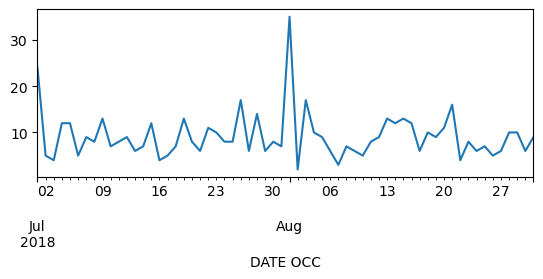

In [5]:
net_df_filtrado["Agressions"].plot(subplots=True, layout=(2,1));

# DIVIDIR DATA Y ENTRENAR MODELO

In [6]:
train_data, test_data = net_df[0:int(len(net_df)*0.8)], net_df.loc['2018-07-01':'2018-08-31']

train_arima = train_data['Agressions']
test_arima = test_data['Agressions']

history = [x for x in train_arima]
y = test_arima
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2921
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -10522.392
Date:                Thu, 01 Feb 2024   AIC                          21048.783
Time:                        19:45:21   BIC                          21060.742
Sample:                             0   HQIC                         21053.091
                               - 2921                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4878      0.003   -160.881      0.000      -0.494      -0.482
sigma2        78.9741      0.337    234.143      0.000      78.313      79.635
Ljung-Box (L1) (Q):                  42.80   Jarque-

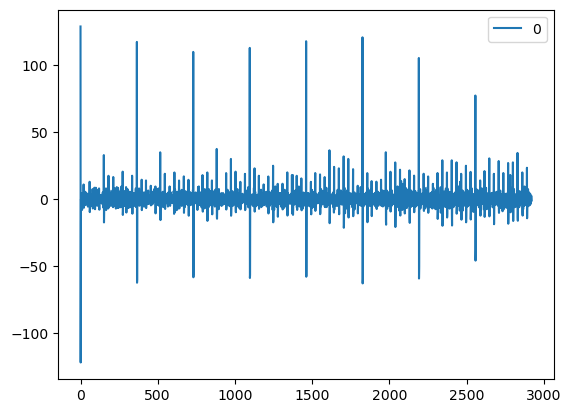

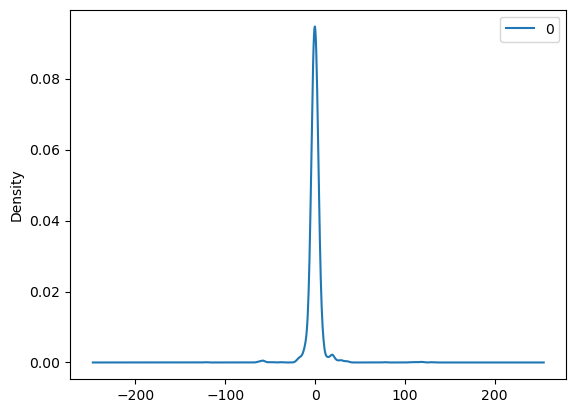

                 0
count  2921.000000
mean     -0.018492
std       9.267548
min    -121.993480
25%      -2.828883
50%      -0.438887
75%       2.438887
max     129.000000


In [7]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [8]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_3227/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [9]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_3227/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [10]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 39.496344167645326
MAE: 4.077142565881544
RMSE: 6.284611695852443


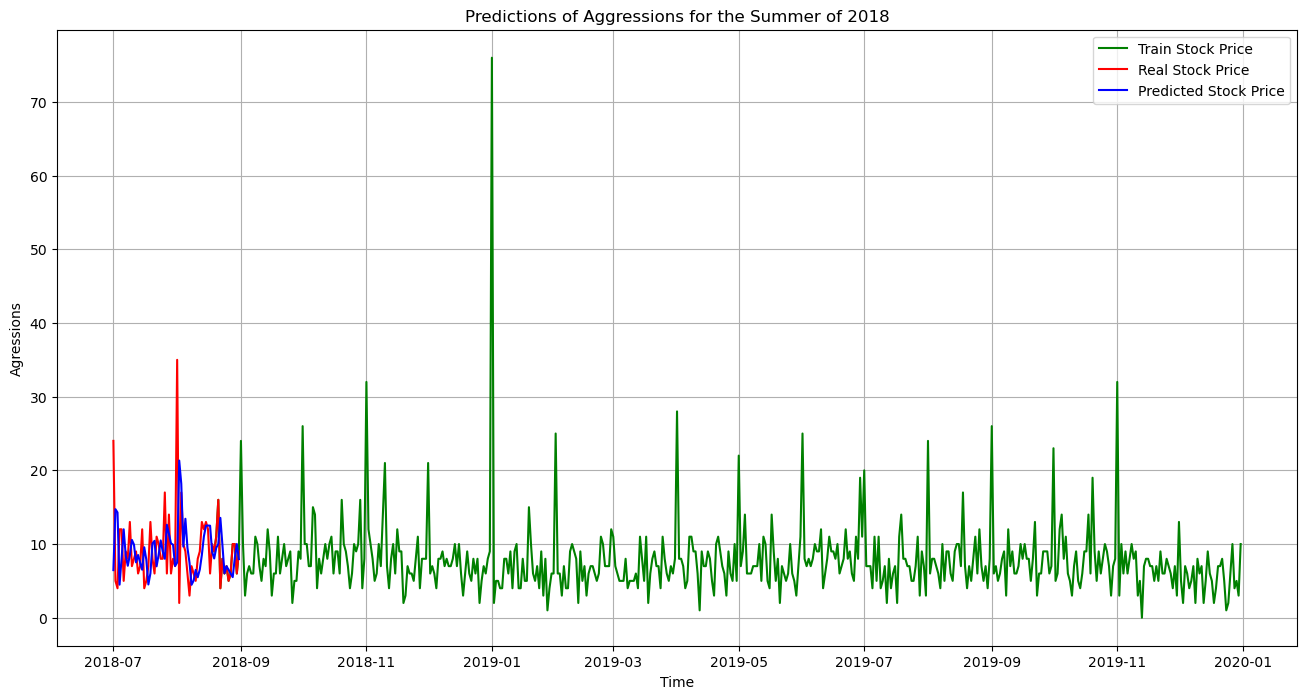

In [12]:
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-500:], net_df['Agressions'].tail(500), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predictions of Aggressions for the Summer of 2018')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()

In [27]:
df_pred = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred = df_pred.iloc[:]
df_pred

,Agressions,Predictions
DATE OCC,,
2018-07-01,24.0,6.463332
2018-07-02,5.0,14.728711
2018-07-03,4.0,14.283664
2018-07-04,12.0,4.487927
2018-07-05,12.0,8.096375
...,...,...
2018-08-27,6.0,5.979645
2018-08-28,10.0,5.510178
2018-08-29,10.0,8.040773


In [28]:
pred_models = pd.read_csv("pred_models_verano_2018_la.csv", index_col="DATE OCC", parse_dates=True)
pred_models

,Agressions,XGBoost
DATE OCC,,
2018-07-02,5.0,5.830963
2018-07-03,4.0,7.294376
2018-07-04,12.0,11.542723
2018-07-05,12.0,9.298620
2018-07-06,5.0,8.617816
...,...,...
2018-08-27,6.0,6.296769
2018-08-28,10.0,7.137698
2018-08-29,10.0,8.556065


In [29]:
pred_models = pred_models.merge(df_pred[['Predictions']], left_index=True, right_index=True, how='left')

In [30]:
pred_models = pred_models.rename(columns={'Predictions':'ARIMA'})

In [31]:
pred_models

,Agressions,XGBoost,ARIMA
DATE OCC,,,
2018-07-02,5.0,5.830963,14.728711
2018-07-03,4.0,7.294376,14.283664
2018-07-04,12.0,11.542723,4.487927
2018-07-05,12.0,9.298620,8.096375
2018-07-06,5.0,8.617816,12.000000
...,...,...,...
2018-08-27,6.0,6.296769,5.979645
2018-08-28,10.0,7.137698,5.510178
2018-08-29,10.0,8.556065,8.040773


In [43]:
pred_models_deepar = pd.read_csv("pred_models_verano_2018_deepar.csv", index_col="DATE OCC", parse_dates=True)

In [44]:
pred_models_deepar.index = pd.to_datetime(pred_models_deepar.index).date

In [45]:
pred_models_deepar

,Agressions,Pred
2018-07-01,24,15.21
2018-07-02,5,10.98
2018-07-03,4,11.26
2018-07-04,12,10.07
2018-07-05,12,7.63
...,...,...
2018-08-26,5,11.78
2018-08-27,6,12.11
2018-08-28,10,16.64
2018-08-29,10,8.60


In [46]:
pred_models = pred_models.merge(pred_models_deepar[['Pred']], left_index=True, right_index=True, how='left')

In [47]:
pred_models = pred_models.rename(columns={'Pred':'DeepAR'})

In [48]:
pred_models

,Agressions,XGBoost,ARIMA,DeepAR
DATE OCC,,,,
2018-07-02,5.0,5.830963,14.728711,10.98
2018-07-03,4.0,7.294376,14.283664,11.26
2018-07-04,12.0,11.542723,4.487927,10.07
2018-07-05,12.0,9.298620,8.096375,7.63
2018-07-06,5.0,8.617816,12.000000,7.34
...,...,...,...,...
2018-08-27,6.0,6.296769,5.979645,12.11
2018-08-28,10.0,7.137698,5.510178,16.64
2018-08-29,10.0,8.556065,8.040773,8.60


In [49]:
# Suponiendo que pred_models es tu DataFrame
pred_models = pred_models.drop(pred_models.index[-1])
pred_models

,Agressions,XGBoost,ARIMA,DeepAR
DATE OCC,,,,
2018-07-02,5.0,5.830963,14.728711,10.98
2018-07-03,4.0,7.294376,14.283664,11.26
2018-07-04,12.0,11.542723,4.487927,10.07
2018-07-05,12.0,9.298620,8.096375,7.63
2018-07-06,5.0,8.617816,12.000000,7.34
2018-07-07,9.0,11.151601,8.414902,6.98
2018-07-08,8.0,8.968402,7.048570,8.53
2018-07-09,13.0,7.637211,8.487844,9.00
2018-07-10,7.0,6.818223,10.560701,8.52


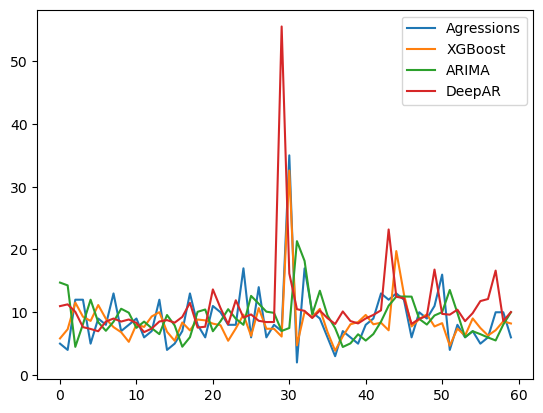

In [50]:
pred_models = pred_models.reset_index()
pred_models.plot(y=["Agressions","XGBoost","ARIMA","DeepAR"])
plt.show()